# Content:
1. [Steps involved in the simplex method](#simplex)
2. [Examples using `scipy.optimize.minimize`](#ex)
3. [Analysis using example 2](#ana)
4. [Selecting an optimization method](#select)

## 1. <a name="simplex">Steps involved in the simplex method</a>

![board%20work%20-89.jpg](boardwork/board%20work%20-89.jpg)
![board%20work%20-90.jpg](boardwork/board%20work%20-90.jpg)
![board%20work%20-91.jpg](boardwork/board%20work%20-91.jpg)
![board%20work%20-92.jpg](boardwork/board%20work%20-92.jpg)

## 2. <a name="ex">Examples using `scipy.optimize.minimize`</a>

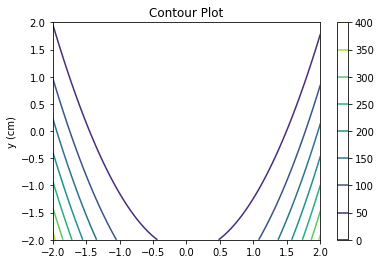

In [1]:
def rosenbrocknD(x):
    
    a = 1
    b = 10
    
    N=len(x)
    
    val=0
    for i in range(N-1):
        val=val+(a-x[i])**2  + b * (x[i+1]-x[i]**2.0)**2
        
    #print(x, val)
    
    return val

import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-2.0, 2.0, 100)
ylist = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = rosenbrocknD([X,Y])
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [2]:
from scipy import optimize

x=[0,0]

out=optimize.minimize(rosenbrocknD,x,method='Nelder-Mead')
print(out)

 final_simplex: (array([[1.00001204, 1.0000192 ],
       [0.99998097, 0.99995694],
       [1.00002528, 1.00006146]]), array([3.82767435e-10, 6.12278854e-10, 1.82538732e-09]))
           fun: 3.827674348859029e-10
       message: 'Optimization terminated successfully.'
          nfev: 129
           nit: 68
        status: 0
       success: True
             x: array([1.00001204, 1.0000192 ])


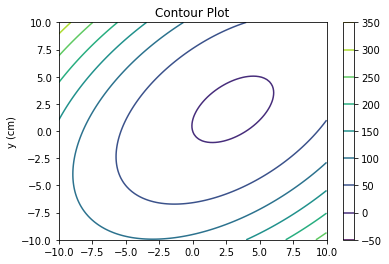

In [3]:
def some2D(x):
    
    val=x[0]**2 - 4*x[0] + x[1]**2 - x[1] - x[0]*x[1]
    
    return val

import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = some2D([X,Y])
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [4]:
x=[0,0]

out=optimize.minimize(some2D,x,method='Nelder-Mead')
print(out)

 final_simplex: (array([[3.00002594, 1.99996289],
       [3.00010833, 2.00005598],
       [2.99994519, 2.00006129]]), array([-7.        , -6.99999999, -6.99999999]))
           fun: -6.9999999969875555
       message: 'Optimization terminated successfully.'
          nfev: 134
           nit: 69
        status: 0
       success: True
             x: array([3.00002594, 1.99996289])


## 3. <a name="ana">Analysis using example 2</a>

The default step in scipy to make the first simplex is 5% of the initial x values. 
Let's overwrite this by passing an initial simplex.

In [5]:
x=[0,0]

out=optimize.minimize(some2D,x,method='Nelder-Mead',options={'xatol': 0.1,'initial_simplex':[[0,0],[1.2,0],[0,0.8]]})
print(out)

 final_simplex: (array([[3.00002332, 2.00368629],
       [3.00793058, 2.00253395],
       [2.993391  , 1.98983258]]), array([-6.9999865 , -6.99995078, -6.99992014]))
           fun: -6.9999864967134116
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 22
        status: 0
       success: True
             x: array([3.00002332, 2.00368629])


First simplex is formed by the three points
``` 
[0. 0.] 0.0                        - bad, B
[1.2 0. ] -3.36                    - good, G
[0.  0.8] -0.15999999999999992     - okay, O
----------------------------------------------------------
```

Mid point (M) of O and G is
```
[0.6 0.4]                          - M
----------------------------------------------------------
```

Find R (reflection through the side GO), `R=2M-B`

```
R should be
[1.2 0.8] -4.4799999999999995     - R
```

Since `R` is better than `B`,let's extend through `R` to `E=2R-M`

```
[2.4-0.6, 1.6-0.4]=[1.8, 1.2]     - E
```





## 4. <a name="select">Selecting an optimization method</a>

![board%20work%20-93.jpg](boardwork/board%20work%20-93.jpg)